<a href="https://colab.research.google.com/github/AidaCPL/BC_Modeling-Sensitivity/blob/main/CBA_Model/CBA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Draft for CBA Model

## Data Simulation

In [1]:
# Import important packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Baseline Data and Assumptions
* `initial_investment` (Capital cost, $800,000,000):
  * This represents the upfront cost required to build the nuclear district heating system, including infrastructure such as pipelines, heat exchangers, and connection to the nuclear plant.
  * It's a one-time cost at the start of the project.
* `annual_heat_demand` (1,000,000 MWh/year):
  * This is the projected annual demand for heat from the district heating system, measured in megawatt-hours (MWh).
  * It indicates the amount of energy the system needs to deliver annually to meet the needs of residential, industrial, or commercial users.
* `energy_price` (`$`50/MWh):
  * This is the selling price of heat energy supplied to consumers, measured in dollars per megawatt-hour.
  * It determines the revenue generated by the project from selling heat to customers.
* `carbon_price` (`$`40/ton):
  * This is the price of carbon emissions, representing the financial value of reducing greenhouse gas emissions (e.g., through carbon credits or avoided emissions penalties).
  * The higher the carbon price, the more financial benefit low-carbon systems (like nuclear district heating) derive from avoided emissions.
* `carbon_savings_per_year` (20,000 tons/year):
  * This represents the annual amount of carbon emissions saved by using nuclear district heating instead of fossil fuel-based systems.
* `heat_density_factor` (1.0):
  * A multiplier representing the efficiency of heat distribution within the district heating system.
  * A value of 1.0 is the baseline; higher values (e.g., 1.2) indicate greater heat density (e.g., serving more customers per km of pipeline), which improves economic viability.
* `transport_distance_km` (50 km):
  * The average distance the heat needs to be transported from the nuclear power plant to end users, measured in kilometers.
  * Longer distances increase transportation costs and reduce heat efficiency.
* `transport_cost_per_km` (`$`900,000/km):
  * The cost of transporting heat over each kilometer of the pipeline, accounting for infrastructure, energy losses, and maintenance.
  * The total transportation cost is calculated as transport_distance_km * transport_cost_per_km.
* `operational_costs` (`$`30,000,000/year):
  * This represents the recurring annual costs of operating and maintaining the district heating system.
  * It includes expenses such as staff salaries, equipment maintenance, system repairs, etc.
* `years` (20):
  * The project lifecycle or evaluation period, typically the number of years the system is expected to operate before major reinvestments or decommissioning.
  * This value is used to calculate Net Present Value (NPV) and Benefit-Cost Ratio (BCR).
* `discount_rate` (0.04 or 4%):
  * The discount rate reflects the time value of money, used to convert future cash flows into their present value.
  * A lower discount rate implies a greater weight on future benefits and costs, while a higher rate reflects a preference for near-term returns.

In [2]:
# Define baseline assumptions
baseline_data = {
    "initial_investment": 800_000_000,  # Capital cost ($)
    "annual_heat_demand": 1_000_000,    # Heat demand (MWh/year)
    "energy_price": 50,                 # Energy price ($/MWh)
    "carbon_price": 40,                 # Carbon price ($/ton)
    "carbon_savings_per_year": 20_000,  # Carbon savings (tons/year)
    "heat_density_factor": 1.0,         # Heat density multiplier (1.0 = baseline)
    "transport_distance_km": 50,        # Average heat transport distance (km)
    "transport_cost_per_km": 900_000,   # Transportation cost ($/km)
    "operational_costs": 30_000_000,    # Annual operational costs ($)
    "years": 20,                        # Project lifecycle
    "discount_rate": 0.04,              # Discount rate
}

## Defining functions for key CBA metrics

**CBA Metrics:**
* Net Present Value (NPV): Total discounted benefits minus costs.
* Benefit-Cost Ratio (BCR): Discounted benefits divided by discounted costs.

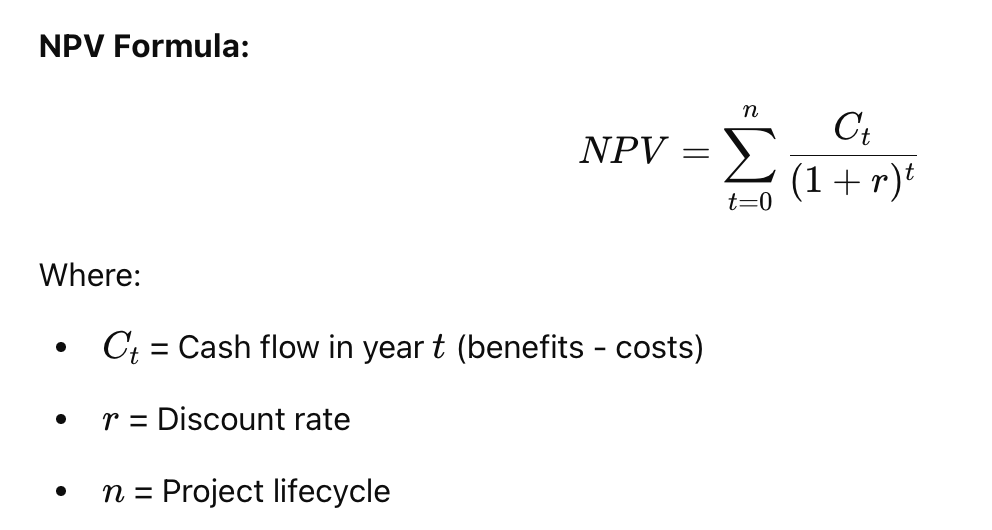

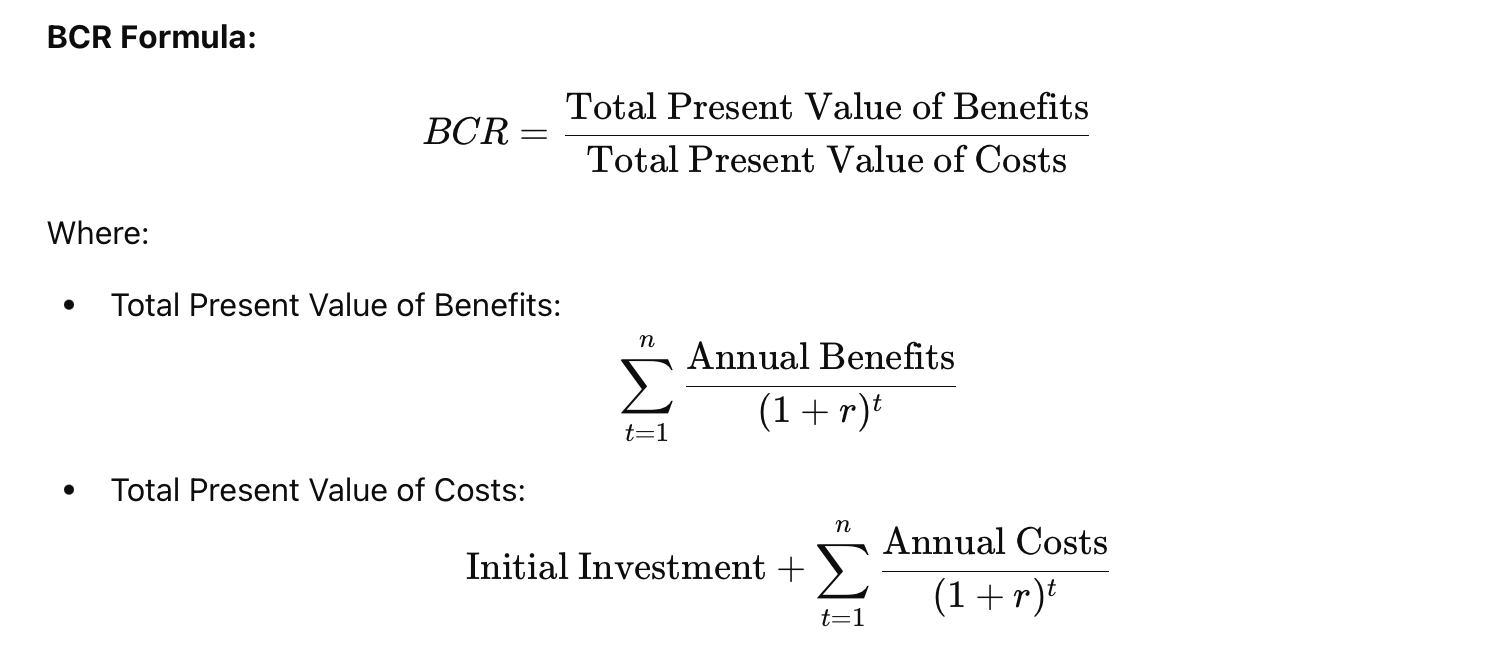

In [3]:
# Define function to calculate NPV
def calculate_npv(data):
    annual_benefit = (
        (data["annual_heat_demand"] * data["energy_price"])
        + (data["carbon_savings_per_year"] * data["carbon_price"])
        - (data["transport_distance_km"] * data["transport_cost_per_km"])
        - data["operational_costs"]
    )
    cash_flows = [-data["initial_investment"]] + [
        annual_benefit / (1 + data["discount_rate"]) ** year for year in range(1, data["years"] + 1)
    ]
    return sum(cash_flows)

# Step 3: Define function to calculate Benefit-Cost Ratio (BCR)
def calculate_bcr(data):
    total_benefits = sum(
        ((data["annual_heat_demand"] * data["energy_price"])
         + (data["carbon_savings_per_year"] * data["carbon_price"]))
        / (1 + data["discount_rate"]) ** year
        for year in range(1, data["years"] + 1)
    )
    total_costs = data["initial_investment"] + sum(
        ((data["transport_distance_km"] * data["transport_cost_per_km"]) + data["operational_costs"])
        / (1 + data["discount_rate"]) ** year
        for year in range(1, data["years"] + 1)
    )
    return total_benefits / total_costs

## Sensitivity Analysis Functions

**Sensitivity Analysis** explores how changes in how:
* Energy prices impact profitability.
* Carbon pricing affects the viability of low-emission heating systems.
* Heat density influences the cost-effectiveness of district heating.
* Transportation costs reduce project efficiency.
* Operational costs sway economic outcomes.

In [4]:
# Sensitivity analysis for key variables
def sensitivity_analysis(data, variable, values):
    results = []
    for value in values:
        data[variable] = value
        npv = calculate_npv(data)
        bcr = calculate_bcr(data)
        results.append({"Variable Value": value, "NPV": npv, "BCR": bcr})
    return pd.DataFrame(results)


In [5]:
# Define ranges for sensitivity analysis
energy_price_range = np.arange(30, 100, 10)  # Energy prices from $30 to $100/MWh
carbon_price_range = np.arange(20, 100, 10)  # Carbon price from $20 to $100/ton
heat_density_range = np.linspace(0.5, 1.5, 10)  # Heat density scaling factor (50% to 150%)
transport_distance_range = np.arange(30, 100, 10)  # Transport distance from 30 to 100 km
operational_cost_range = np.arange(20_000_000, 60_000_000, 5_000_000)  # Operational costs from $20M to $60M

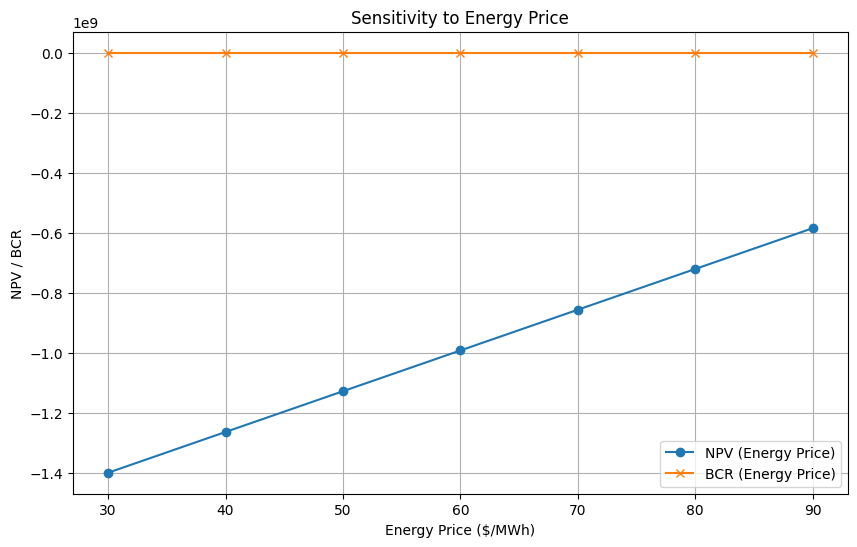

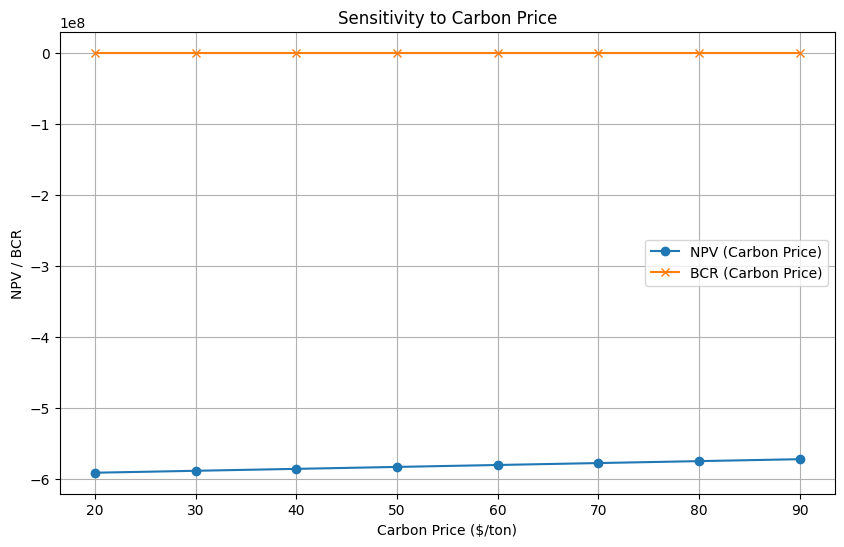

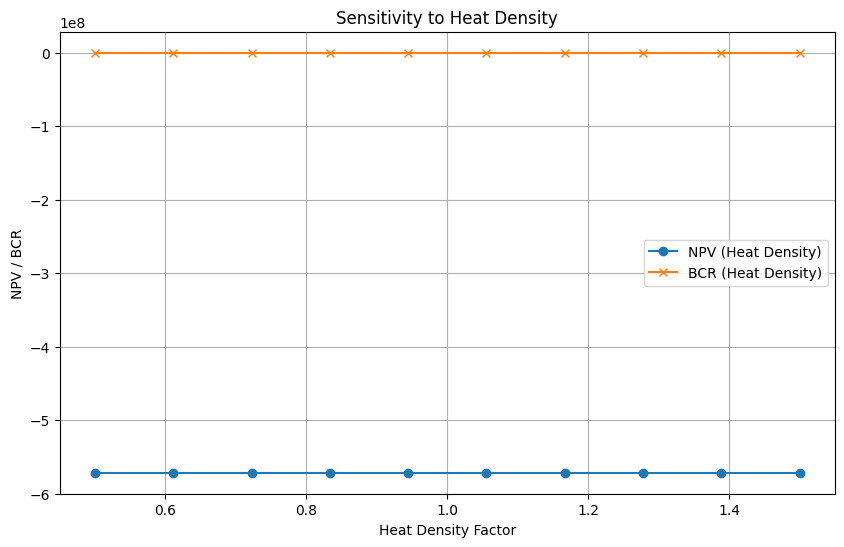

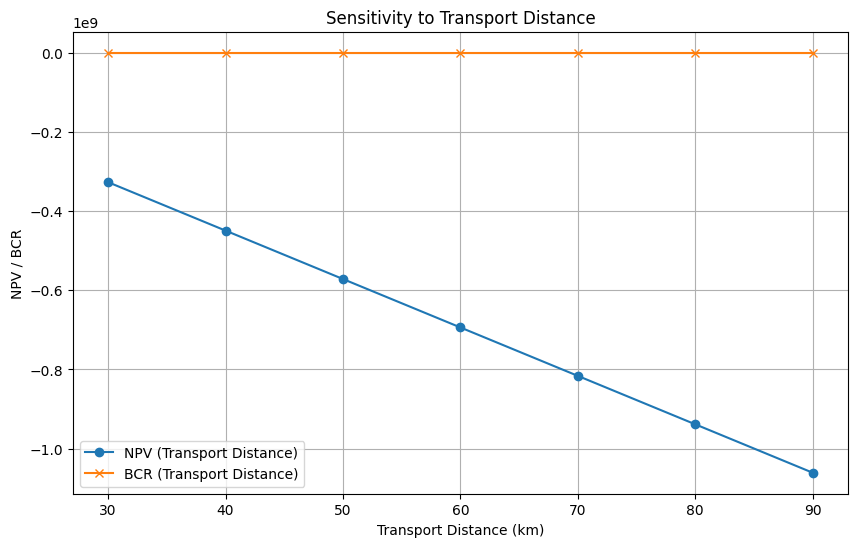

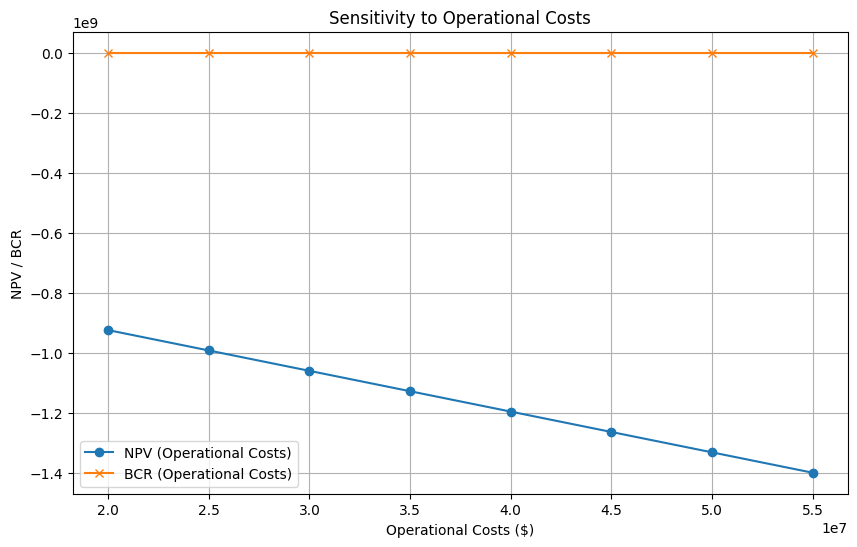

In [8]:
# Run sensitivity analyses
if __name__ == "__main__":
    # Baseline data copy to ensure original data integrity
    data = baseline_data.copy()

    # Energy price sensitivity
    energy_results = sensitivity_analysis(data, "energy_price", energy_price_range)

    # Carbon price sensitivity
    carbon_results = sensitivity_analysis(data, "carbon_price", carbon_price_range)

    # Heat density sensitivity
    data["annual_heat_demand"] *= 1.0  # Reset heat demand
    density_results = sensitivity_analysis(
        data, "heat_density_factor", heat_density_range
    )

    # Transport distance sensitivity
    transport_results = sensitivity_analysis(data, "transport_distance_km", transport_distance_range)

    # Operational cost sensitivity
    operational_results = sensitivity_analysis(data, "operational_costs", operational_cost_range)

    # Step 7: Plot sensitivity analysis results
    plt.figure(figsize=(10, 6))
    plt.plot(energy_results["Variable Value"], energy_results["NPV"], marker="o", label="NPV (Energy Price)")
    plt.plot(energy_results["Variable Value"], energy_results["BCR"], marker="x", label="BCR (Energy Price)")
    plt.title("Sensitivity to Energy Price")
    plt.xlabel("Energy Price ($/MWh)")
    plt.ylabel("NPV / BCR")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(carbon_results["Variable Value"], carbon_results["NPV"], marker="o", label="NPV (Carbon Price)")
    plt.plot(carbon_results["Variable Value"], carbon_results["BCR"], marker="x", label="BCR (Carbon Price)")
    plt.title("Sensitivity to Carbon Price")
    plt.xlabel("Carbon Price ($/ton)")
    plt.ylabel("NPV / BCR")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(density_results["Variable Value"], density_results["NPV"], marker="o", label="NPV (Heat Density)")
    plt.plot(density_results["Variable Value"], density_results["BCR"], marker="x", label="BCR (Heat Density)")
    plt.title("Sensitivity to Heat Density")
    plt.xlabel("Heat Density Factor")
    plt.ylabel("NPV / BCR")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(transport_results["Variable Value"], transport_results["NPV"], marker="o", label="NPV (Transport Distance)")
    plt.plot(transport_results["Variable Value"], transport_results["BCR"], marker="x", label="BCR (Transport Distance)")
    plt.title("Sensitivity to Transport Distance")
    plt.xlabel("Transport Distance (km)")
    plt.ylabel("NPV / BCR")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(operational_results["Variable Value"], operational_results["NPV"], marker="o", label="NPV (Operational Costs)")
    plt.plot(operational_results["Variable Value"], operational_results["BCR"], marker="x", label="BCR (Operational Costs)")
    plt.title("Sensitivity to Operational Costs")
    plt.xlabel("Operational Costs ($)")
    plt.ylabel("NPV / BCR")
    plt.legend()
    plt.grid()
    plt.show()


### Graph Interpretation:
* **Sensitivity to Energy Price:**
  * Net Present Value (NPV) increases as energy prices rise. This is because higher energy prices generate more revenue, improving the project's profitability.
  * Benefit-Cost Ratio (BCR) appears constant and very high, suggesting that even with changes in energy price, the benefits always outweigh the costs significantly.
* **Sensitivity to Carbon Price:**
  * NPV increases slightly with higher carbon prices. This is because higher carbon prices provide more financial rewards for carbon savings.
  * BCR is nearly constant, implying that carbon price fluctuations have a minor effect on the cost-benefit balance.
* **Sensitivity to Heat Density:**
  * NPV is flat and low, meaning changes in heat density have minimal impact on the project profitability in this setup.
  * BCR is similarly constant, suggesting that the heat density factor doesn't significantly alter the balance between benefits and costs.
* **Sensitivity to Transport Distance:**
  * NPV decreases as transport distance increases. Longer transport distances raise costs (e.g., pipeline costs and heat loss), reducing profitability.
  * BCR remains constant but indicates a worsening cost-benefit relationship with increasing distance.
* **Sensitivity to Operational Costs:**
  * NPV decreases as operational costs increase, as these directly reduce annual cash flow and project profitability.
  * BCR remains constant, reflecting the consistent relationship between benefits and costs despite rising operational expenses.